In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np

In [2]:
#Some plot settings so the plots are good looking like whoever is reading this :))))
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

In [3]:
#Importing clean and enriched dataset
df = pd.read_csv('output/enriched_data.csv')
df = df.set_index('Unnamed: 0')
df.index.name = None

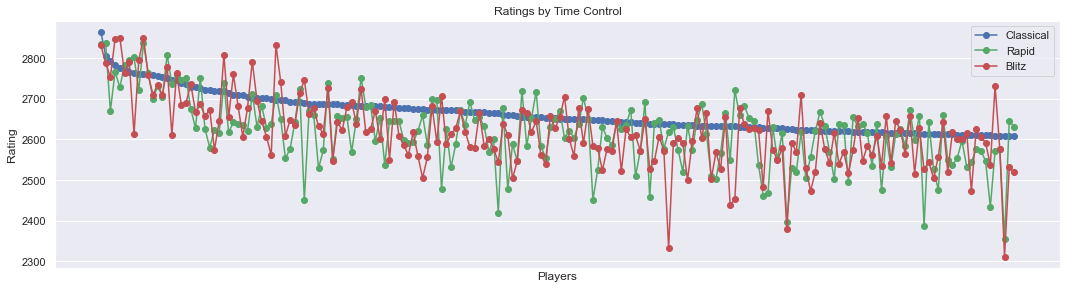

In [4]:
#Plot of classical, rapid and blitz rapid for each player, ordered by rank (or classical rating)
#I drop the outliers that had a blitz rating less than 2300
df = df.drop(df[df.rapid < 2300].index)
sns.set(rc={'figure.figsize':(18,10)})
fig, ax = plt.subplots()
plt.subplot(211)
plt.plot('name', 'ELO', data=df, linestyle='-', marker='o', label='Classical')
plt.plot('name', 'rapid', data=df, linestyle='-', marker='o', c='g', label='Rapid')
plt.plot('name', 'blitz', data=df, linestyle='-', marker='o', c='r', label='Blitz')
plt.xticks([])
plt.legend(loc="upper right")
plt.title("Ratings by Time Control")
plt.ylabel("Rating")
plt.xlabel("Players")
plt.show()
fig.figure.savefig("Output/Images/Rating_by_time_control.png", dpi=1000)

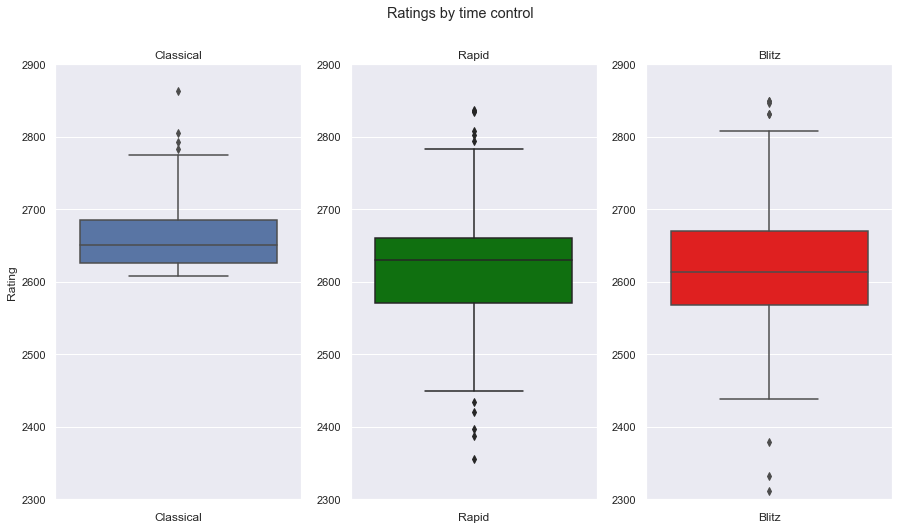

In [5]:
#Plot of the same data but grouped in boxplots
sns.set(rc={'figure.figsize':(15,8)})
fig, axs = plt.subplots(ncols=3)
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
sns.boxplot(y="ELO", data=df, ax=axs[0])
sns.boxplot(y="rapid", data=df, color='green', ax=axs[1])
sns.boxplot(y="blitz", data=df, color='red', ax=axs[2])
ax1.set(xlabel='Classical', ylabel='Rating', title="Classical", ylim=[2300,2900])
ax2.set(xlabel='Rapid', ylabel='', title="Rapid", ylim=[2300,2900])
ax3.set(xlabel='Blitz', ylabel='', title="Blitz", ylim=[2300,2900])
fig.suptitle('Ratings by time control')
fig.figure.savefig("Output/Images/Rating_by_time_control_boxplots.png", dpi=1000)

In [6]:
#Correlation matrix for all variables
corr = df.corr()
corr

,rank,ELO,games,birth_year,age,rapid,blitz
rank,1.000000,-0.932881,-0.315046,-0.076485,0.076485,-0.535558,-0.597742
ELO,-0.932881,1.000000,0.385746,0.061160,-0.061160,0.602737,0.656080
games,-0.315046,0.385746,1.000000,-0.700604,0.700604,0.476046,0.373627
birth_year,-0.076485,0.061160,-0.700604,1.000000,-1.000000,-0.270359,-0.090750
age,0.076485,-0.061160,0.700604,-1.000000,1.000000,0.270359,0.090750
rapid,-0.535558,0.602737,0.476046,-0.270359,0.270359,1.000000,0.601751
blitz,-0.597742,0.656080,0.373627,-0.090750,0.090750,0.601751,1.000000


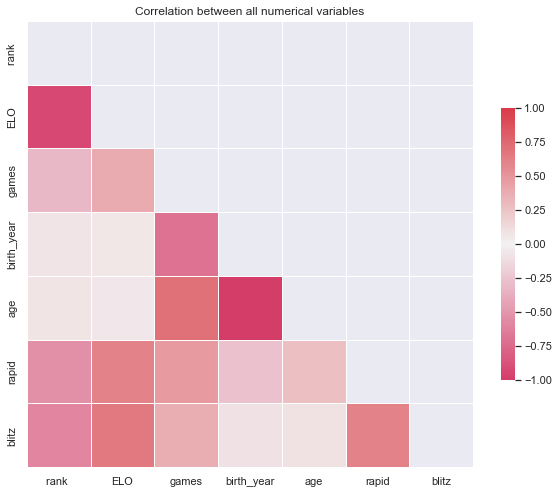

In [7]:
#Correlation heatmap
sns.set(rc={'figure.figsize':(10,10)})
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
graf = sns.heatmap(corr, 
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5, 
            vmin = -1,
            vmax=1,
            cbar_kws={"shrink": .5}
)
graf.set(title='Correlation between all numerical variables')
fig = graf.get_figure()
fig.figure.savefig("Output/Images/correlation_all.png", dpi=1000)

In [8]:
#Correlation matrix but just for relevant variables
cols = list(['ELO','age','rapid','blitz'])
corr = df[cols].corr()
corr

,ELO,age,rapid,blitz
ELO,1.000000,-0.061160,0.602737,0.656080
age,-0.061160,1.000000,0.270359,0.090750
rapid,0.602737,0.270359,1.000000,0.601751
blitz,0.656080,0.090750,0.601751,1.000000


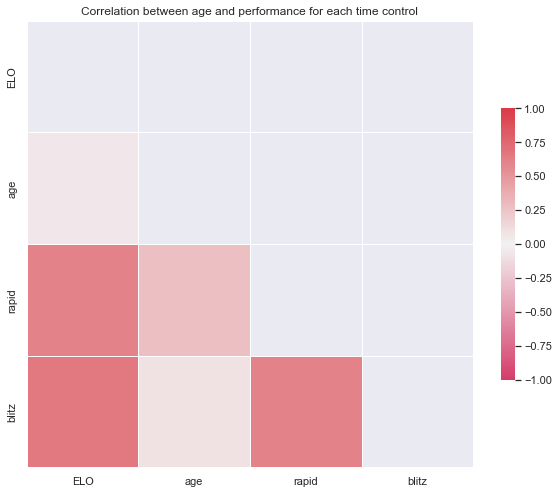

In [9]:
#Correlation heatmap
sns.set(rc={'figure.figsize':(10,10)})
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
graf = sns.heatmap(corr,  
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5, 
            vmin=-1,            
            vmax=1,
            cbar_kws={"shrink": .5}
)
graf.set(title='Correlation between age and performance for each time control')
fig = graf.get_figure()
fig.figure.savefig("Output/Images/correlation_age_time.png", dpi=1000)

In [10]:
#I add 2 new columns: First one is the difference between rapid rating and classical rating
#Second one is the same but blitz-classic
df["Classical-Rapid difference"]=df["rapid"]-df["ELO"]
df["Classical-Blitz difference"]=df["blitz"]-df["ELO"]

In [11]:
#Correlation between those differences and age
cols = list(['age','Classical-Rapid difference','Classical-Blitz difference'])
corr = df[cols].corr()
corr

,age,Classical-Rapid difference,Classical-Blitz difference
age,1.000000,0.380755,0.162280
Classical-Rapid difference,0.380755,1.000000,0.346952
Classical-Blitz difference,0.162280,0.346952,1.000000


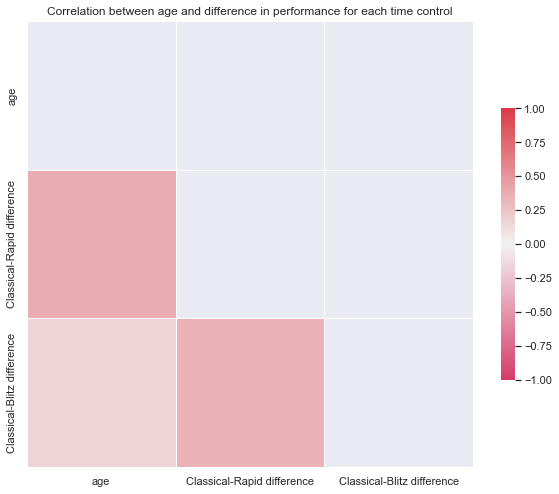

In [12]:
#Correlation heatmap
sns.set(rc={'figure.figsize':(10,10)})
mask = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True)
graf = sns.heatmap(corr, 
            mask = mask,
            cmap=color_map,
            square=True, 
            linewidth=0.5, 
            vmin = -1,
            vmax=1,
            cbar_kws={"shrink": .5}
)
graf.set(title='Correlation between age and difference in performance for each time control')
fig = graf.get_figure()
fig.figure.savefig("Output/Images/correlation_age_time_difference.png", dpi=1000)